<div style="color: #FF5733; 
        font-weight:600; 
        font-size: 24px;  
        text-align: center;">RELATÓRIO INVESTIGANDO CONJUNTO DE DADOS</div>

<h2>Introdução</h2>

<br>
O RM Titanic foi um navio de passageiros britânicos. Sua construção durou 2 anos. O Titanic foi pensado para ser um o navio mais luxuoso e mais seguro da sua época, gerando até lendas que era para ser supostamente “inafundável”.
<p>
A embarcação partiu em sua viagem inaugural de Southampton para Nova Iorque em 10 de abril de 1912. Ele colidiu com o iceberg e afundou com mais de 1500 habitantes a bordo, sendo um dos maiores desastres marítimos em tempos de paz de toda a história.


<h2>Apresentando os dados</h2>

<br>
Esse estudo, realizerei intuições acerca dos tripulantes e das circustância que envolveram o acidente. Este conjunto de dados não abriga informações de todos os passageiros, mas apenas 891.

<h2>Algumas perguntas a serem investigada:</h2>
<br>
Dentre o conjundo de dados, gostaria de saber a resposta para algumas respostas para as perguntas.
<ul>
    <li><s>1. Quantos foram os que sobrevieram?</s></li>
    <li><s>2. Quantos foram os que morreram na catástrofe ?</s> </li>
    <li><s>3. Dentre os que sobreviveram, qual a média da idade ?</s></li>
    <li><s>4. Dentre os que não sobreviram, qual a média de idade ?</s></li>
    <li><s>5. Qual a relação entre os sobreviventes e a classe de ingresso ?</s></li>
    <li><s>6. Qual ponto de embarque recebeu mais passageiros ?</s></li>
    <li><s>7. Qual o sexo mais relevante entre os sobreviventes ?</s></li>
    <li><s>8. Quantos bilhetes unicos existem ?</s></li>
    <li><s>9. Quantos bilhetes duplicados existem ?</s></li>
    <li><s>10. Quais as caracteristicas dos passageiros com bilhetes duplicados?</s></li>
</ul>   

# INICIANDO A ANALISE
<i >Importando bibliotecas que sera preciso para analise</i>

In [1]:
from plotnine import *
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

import pandas as pd
from pandas import Series,DataFrame
import warnings

warnings.filterwarnings('ignore')


import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline



<i>Carregando o dataset disponivel pela Udacity</i>

In [2]:
# carregamento do arquivo.
df = pd.read_csv('dados/titanic_data.csv')

### Visão geral do conjunto de dados
Pelo método ```df.head``` ira exibir as 5 primeiras linhas dado e, em seguida o metódo  ```df.describe``` imprime as estatísticas gerais do conjunto de dados.<br>

Primeiro, o conjunto de dados é limpo para remover ou substituir valores ausentes. As colunas no conjunto de dados são;
<table border="1" width="50%" align=left>
    <tr><td>PassengerId:</td><td style="text-align:left"> 
Identidade de Passageiros</td></tr>
    <tr><td>Survived: </td><td style="text-align:left">Se o passageiro sobreviveu ou não</td></tr>
    <tr><td>Pclass:</td><td style="text-align:left">Classe do ingresso</td></tr>
    <tr><td>Name: </td><td style="text-align:left">Nome do passageiro</td></tr>
    <tr><td>Sex:</td><td style="text-align:left"> Sexo de passageiro (masculino ou feminino)</td> </tr>
    <tr><td>Age:</td><td style="text-align:left">Idade do passageiro </td></tr>
    <tr><td>SibSp:</td><td style="text-align:left">Número de irmãos e / ou cônjuges que viajam com passageiros</td></tr>
    <tr><td>Parch:</td><td style="text-align:left">Número de pais e / ou filhos viajando com passageiros</td></tr>
    <tr><td>Ticket: </td><td style="text-align:left">Número do bilhete </td></tr>
    <tr><td>Fare:</td><td style="text-align:left">  Preço do bilhete </td></tr>
    <tr><td>Cabin:</td><td style="text-align:left"> Número da cabine</td></tr>
    </tr>
    
</table>


<h2>Conhecendo a dimensão</h2>

In [3]:
print("Número de linhas", df.shape[0])
print("Número de linhas", df.shape[1])

Número de linhas 891
Número de linhas 12


In [4]:
# exibe a 5 primeiras linhas dos dados
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<i>Acima lista a 5 primeiras linhas do ```dataSet```, algumas colunas que não serão utilizadas na analise serão removidas, são elas: 
     <ul>
        <li>PassengerId - código do passageiro. </li>
        <li>SibSp       - Quantidade de irmãos/cônjuge abordo. </li>
        <li>Pash        - quantidade de pais/crianças a bordo.</li>
        <li>Cabin       - numero da cabinhe. </li>
    </ul>
Esta váriaveis não são pertinentes para as perguntas solicitadas.
    </i>

In [5]:
#removendo coluna, essas colunas não serão necessária nas analises
df.drop(['PassengerId','SibSp','Parch','Cabin'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S


In [6]:
#imprime as estatísticas gerais do conjunto de dado
df.describe(include="all")

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked
count,891.000000,891.000000,891,891,714.000000,891,891.000000,889
unique,NaN,NaN,891,2,NaN,681,NaN,3
top,NaN,NaN,"Jansson, Mr. Carl Olof",male,NaN,CA. 2343,NaN,S
freq,NaN,NaN,1,577,NaN,7,NaN,644
mean,0.383838,2.308642,NaN,NaN,29.699118,NaN,32.204208,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,NaN,49.693429,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,NaN,0.000000,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,NaN,7.910400,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,NaN,14.454200,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,NaN,31.000000,NaN


<i>As colunas foram removidas. Mais a baixo irei adicionar novas colunas.</i>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 55.8+ KB


<i> As informações acima, as colunas (Age,Embarked) esta com dados nulos. E essas colunas serão utilizada para analis</i>

In [8]:
df.tail()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.00,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.00,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,W./C. 6607,23.45,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.00,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,370376,7.75,Q


<h2>Dicionário de dados atualizado</h2>
<br>
<strong>Survived:</strong> Informa se o passageiro sobreviveu ao desastre. 0 = Não; 1 = Sim<br>
<strong>Pclass:</strong> Classe na qual o passageiro viajou. 1 = Primeira Classe; 2 = Segunda Classe; 3 = Terceira Classe<br>
<strong>Name:</strong> Nome do passageiro<br>
<strong>Sex:</strong> Sexo do passageiro<br>
<strong>Age:</strong> Idade do passageiro<br>
<strong>Ticket:</strong> Valor da passagem<br>
<strong>Embarked:</strong> Local onde o passageiro embarcou<br>

### Validando 3 problemas comuns: (dados faltantes, linhas duplicadas, tipos de dados incorretos)

<i> Nas informações acima, as colunas (Age,Embarked) esta com dados nulos.<br>
    Irei adicionar novas colunas categorias para gerar alguns gráficos.<br>
Estou transformando os rótulos `zero` e `um` em algo mais legível com a função apply e, então, convertendo a series para o tipo categórico com a função astype
</i>


In [9]:
df['cat_Survived'] = df.Survived.apply(lambda x: ["morto", "sobrevivido"][x]).astype("category")
# veja o resultado a seguir
df['cat_Survived'].head()

0          morto
1    sobrevivido
2    sobrevivido
3    sobrevivido
4          morto
Name: cat_Survived, dtype: category
Categories (2, object): [morto, sobrevivido]

# 1. Sobrevidos e Mortos

<i style="font-size:18px;color:#00008B;font-weight:bold">Quantos foram os sobreviventes? E Quantos foram os que morreram?</i>

Text(0,0.5,'')

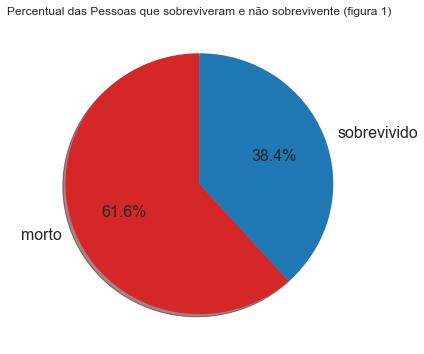

In [10]:
df.cat_Survived.value_counts().plot.pie(colors=('tab:red', 'tab:blue'),
                                         title='Percentual das Pessoas que sobreviveram e não sobrevivente (figura 1)',
                                         fontsize=16, shadow= True, startangle=90, autopct='%1.1f%%',
                                         figsize=(6,6)).set_ylabel('')



In [11]:
df['cat_Survived'].value_counts()

morto          549
sobrevivido    342
Name: cat_Survived, dtype: int64

<i style="font-size:17px">Como da para perceber na figura 1 e no resultado da coluna `cat_Survived`, mais da metade dos passageiros morreram.
<p></i>    

# 2. Idade

<b><i style="font-size:18px;color:#00008B;">Dos que sobreviveram qual a média de idade? Dos que não sobreviveram qual a média de idade?</i></b>

  ### Exibindo Histogramas das idades

Text(0,0.5,'Frequencia')

<Figure size 432x288 with 0 Axes>

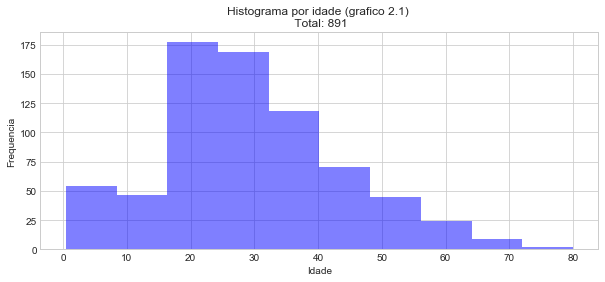

In [12]:
plt.figure();
df.hist(column='Age', color=('blue'), alpha=0.5, bins=10, figsize=(10,4))
plt.title('Histograma por idade (grafico 2.1) \n Total: %s' % (df.shape[0]))
plt.xlabel('Idade')
plt.ylabel('Frequencia')

<i>Percebe-se pelo histograma (figura 2) que os passageiros tinha aproximadamente entre 18 a 32 anos.<p>
Dentre esses, percebece-se que algumas idades não estavam preenchidades.
</i> 

In [13]:
print("SEM idade preenchidas: ", df.Age.isnull().sum())
print("COM idade preenchidas: ", (~df.Age.isnull()).sum())

SEM idade preenchidas:  177
COM idade preenchidas:  714


<i> Aqui será criada um novo `dataFrame`, neste será removida as colunas das idades e adicionando uma nova coluna para definir se era criança, adulto ou idoso</i>

### Exibindo Histogramas das idades dos sobrevivente e não sobreviventes

In [14]:
#faz a cópia do dataFrame para pegar a idade média dos sobreviventes
df_age = df.copy()
# removendo idades nulas
df_age.dropna(subset=['Age'], inplace=True)

# criando a coluna faixa_etaria com valores nulos
df_age['faixa_etaria'] = None

# povoando as linhas dos adultos.
# linhas nas quais a idade está no intervalo [15, 45).
df_age.loc[(15 <= df_age.Age) & (df_age.Age < 45), 'faixa_etaria'] = 'adulto'

# povoe as linhas das crianças.
# linhas nas quais a idade está no intervalo [0, 15).
df_age.loc[(0 <= df_age.Age) & (df_age.Age < 15), 'faixa_etaria'] = 'crianca'

# povoe as linhas dos idoso.
# linhas nas quais a idade está no intervalo [45, 100].
df_age.loc[(45 <= df_age.Age) & (df_age.Age < 100), 'faixa_etaria'] = 'idoso'
df_age.faixa_etaria.value_counts()
df_age['faixa_etaria_qcut'] = pd.qcut(df_age.Age, q=[0, .10, .85, 1.], labels=['crianca', 'adulto', 'idoso'])
df_age.faixa_etaria_qcut.value_counts().sort_values(ascending=True)

crianca     77
idoso      103
adulto     534
Name: faixa_etaria_qcut, dtype: int64

<Figure size 432x288 with 0 Axes>

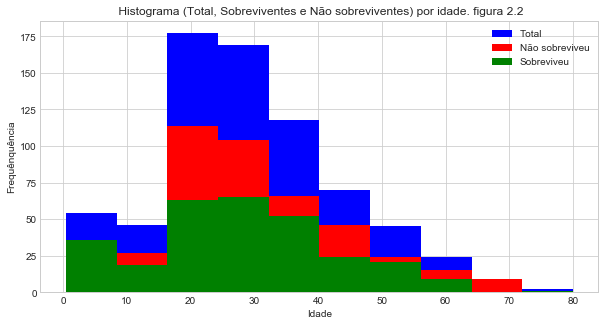

In [15]:
df_histage = pd.DataFrame({'Total': df_age['Age'],
                          'Não sobreviveu': df_age[df_age['Survived'] == 0]['Age'],
                          'Sobreviveu': df_age[df_age['Survived']==1]['Age']},
                          columns=['Total','Não sobreviveu', 'Sobreviveu']
                         )
plt.figure()

df_histage.plot.hist(bins=10, figsize=(10,5), color=('blue', 'red', 'green'),
                    title=' Histograma (Total, Sobreviventes e Não sobreviventes) por idade. figura 2.2')
plt.xlabel('Idade')
plt.ylabel('Frequênquência')
plt.show()


<i>O gráfico acima, exibe que o maior indice de sobrevivência foram as crianças.</i>

In [16]:
df_age.groupby('faixa_etaria')['Survived'].mean()

faixa_etaria
adulto     0.387716
crianca    0.576923
idoso      0.373913
Name: Survived, dtype: float64

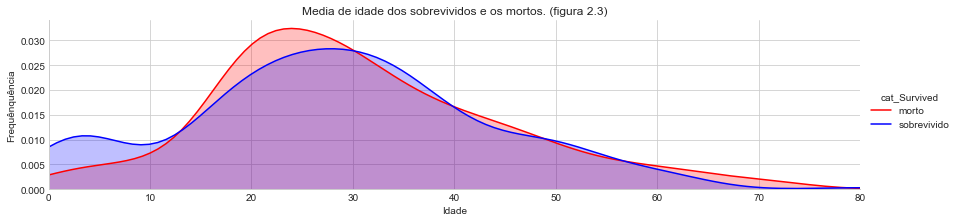

In [17]:
facet = sns.FacetGrid(df_age, hue="cat_Survived",aspect=4, hue_kws={'color': ['r', 'b']})
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df_age['Age'].max()))
facet.add_legend()

plt.title("Media de idade dos sobrevividos e os mortos. (figura 2.3)")
plt.xlabel('Idade')
plt.ylabel('Frequênquência')
plt.show()


<i>Como percebe-se, a média de idade dos sobreviventes esta até 10 anos, e os não sobreviventes estão entre 18 a 30 anos.<br> No histograma da figura 2.1, mostra que havia mais passageiro com idade entre 18 a 32 anos. Mas neste gráfico quando se faz a analise percebe-se que os mortos foram entre 18 a 28 anos</i>

# 3. Classe

<b><i style="font-size:18px;color:#00008B;">Qual a relação entre os sobreviventes e a classe de ingresso ?</i></b>

In [18]:
vcolor2 = ['tab:green', 'tab:blue', 'tab:red', 
           'tab:orange', 'tab:purple', 'tab:brown', 'tab:gray', 'tab:pink','tab:olive','tab:cyan']

#função para retornar o tipo de classe socio economica
def func(x):    
    if x == 1:
        return "1 - Classe rica"
    elif x  == 2:
        return "2 - Classe média"
    elif x == 3:
        return "3 - Classe baixa"
    else:
        return 'N/A'

df['cat_Pclass'] =  df.Pclass.apply(func).astype("category")


In [19]:
# listando a quantidade de class por tipo
df_class = df.pivot_table(index='cat_Pclass', values='Name', aggfunc='count').sort_values(by='cat_Pclass', ascending=True)
df_class


,Name
cat_Pclass,
1 - Classe rica,216
2 - Classe média,184
3 - Classe baixa,491


Text(0,0.5,'Quantidade')

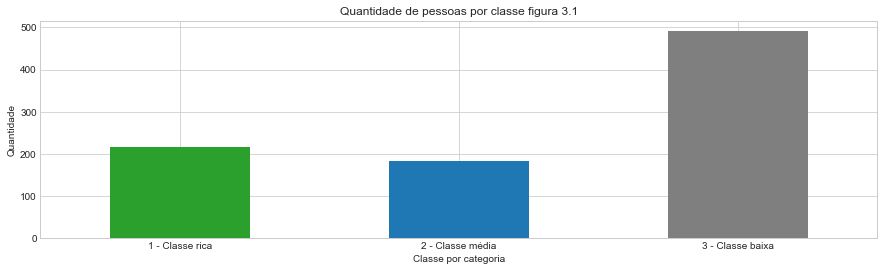

In [20]:
list_cores = 'tab:green', 'tab:blue', 'tab:gray' 

#criando o grafico por quantidade de pessoas por class
df_class.plot(kind='bar', legend=False, figsize=(15,4), 
              title='Quantidade de pessoas por classe figura 3.1',
              color=(list_cores), rot=0).set_xlabel('Classe por categoria')
plt.ylabel('Quantidade')

<i> Na figura 3.1, apresenta a quantidade de pessoas por classe e percebe-se que há mais pessoas na classe inferior</i>

Text(0.5,0,'Classe')

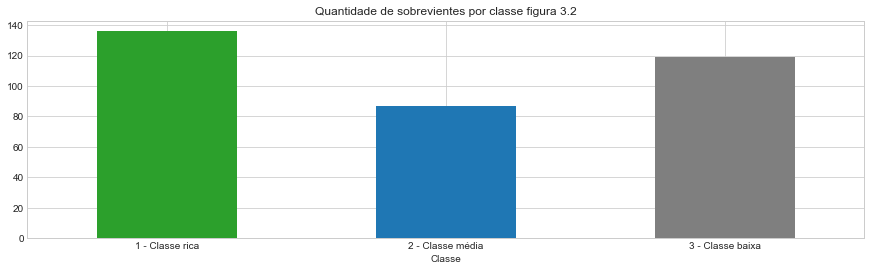

In [21]:
df[df['Survived']==1].groupby('cat_Pclass').sum()['Survived'].plot(kind='bar',
                                                               title='Quantidade de sobrevientes por classe figura 3.2', 
                                                               figsize=(15,4),
                                                               color=['tab:green', 'tab:blue', 'tab:gray'], rot=0).set_xlabel('Classe')

<i>Na figura 3.1, mostra que havia mais pessoas da classe inferior, mas neste gráfico da figura 3.2, mostra que houve mais sobrevivente na classe rica.</i>

In [22]:
df_sobrevivetes = df.groupby('cat_Pclass')[['Survived']].sum()

Text(0,0.5,'')

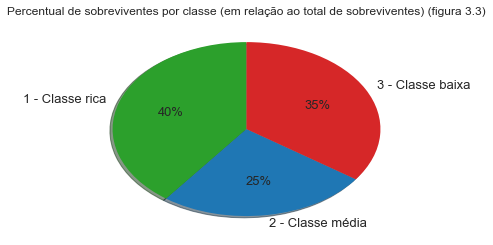

In [23]:
df_sobrevivetes.apply(lambda x: (x / x.sum(axis=0))*100)['Survived'].plot.pie(fontsize=13,
                                                                             title='Percentual de sobreviventes por classe (em relação ao total de sobreviventes) (figura 3.3)',
                                                                             startangle=90,
                                                                             autopct='%1.0f%%',
                                                                             shadow=True,
                                                                             colors = vcolor2,
                                                                             figsize=(6,4)).set_ylabel('')

<i> Na figura acima 3.3 mostra que houve mais morte na classe baixa

## 4.Embarked
<i style="font-size:18px;color:#00008B;font-weight:bold"> Qual ponto de embarque recebeu mais passageiros ?</i><br>
Embarked (Embarque): Porto de embarque (C= Chebourg, Q = Queenstown, S=Southampton)

In [24]:
# listando a quantidade de class por tipo
#cria uma nova coluna.
df_emb = df.copy()
df_emb.drop(df_emb[df_emb['Embarked'].isnull() == True].index, inplace=True)

# criando a coluna faixa_etaria com valores nulos
df_emb['embarque'] = None

# povoe as linhas das crianças.
# linhas nas quais a idade está no intervalo [0, 15).
# descomente a linha abaixo e substitua ... pela expressão correta
df_emb.loc[('C' == df_emb.Embarked), 'embarque'] = 'C = Chebourg'

# povoando as linhas dos adultos.
# linhas nas quais a idade está no intervalo [15, 45).
df_emb.loc[('Q' == df_emb.Embarked), 'embarque'] = 'Q = Queenstown'


# povoe as linhas dos idoso.
# linhas nas quais a idade está no intervalo [45, 100].
# descomente a linha abaixo e substitua ... pela expressão correta
df_emb.loc[('S' == df_emb.Embarked), 'embarque'] = 'S = Southampton'



In [25]:
embaque = df_emb.pivot_table(index='embarque', values='Name', aggfunc='count')
embaque


,Name
embarque,
C = Chebourg,168
Q = Queenstown,77
S = Southampton,644


Text(0,0.5,'Quantidade')

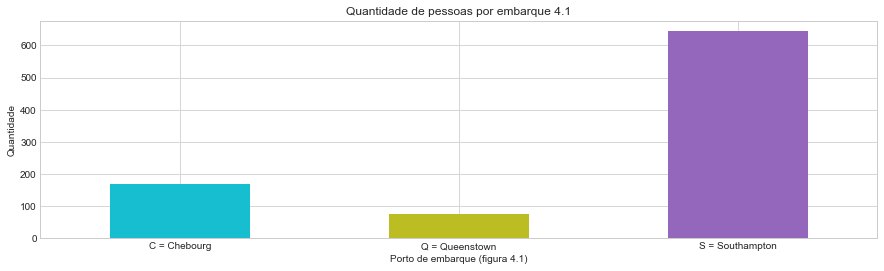

In [26]:
embaque.plot(kind='bar', legend=False, figsize=(15,4), 
              title='Quantidade de pessoas por embarque 4.1',
              color=('tab:cyan', 'tab:olive', 'tab:purple'), rot=0).set_xlabel('Porto de embarque (figura 4.1)')
plt.ylabel('Quantidade')

# 5.Sexo

<i style="font-size:18px;color:#00008B;font-weight:bold">  Qual o sexo mais relevante entre os sobreviventes ?</i><p>
<i>Para facilitar a leitura do gráfico, ira alterar os campos da coluna sexo <br>
 <ul>
     <li>Male => Homem</li>
     <li>Famale => Mulher</li>
 </ul>
</i>

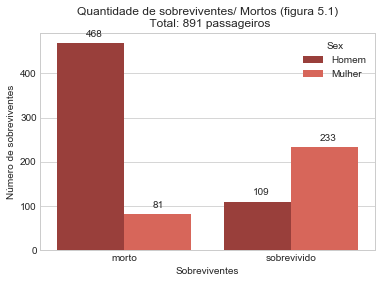

In [27]:
# alterando a coluna os itens da coluna sex
df['Sex'] = df['Sex'].map({'female': 'Mulher', 'male': 'Homem'})
passageiros = sns.countplot(data=df, x='cat_Survived',hue='Sex', palette='Reds_d')

for p in passageiros.patches:
    b=p.get_bbox()
    passageiros.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 -0.03, b.y1+ 15))
plt.title("Quantidade de sobreviventes/ Mortos (figura 5.1)\n Total: %s passageiros" % (df.shape[0]))
plt.xlabel("Sobreviventes")
plt.ylabel("Número de sobreviventes")
plt.show()

<i>Na figura acima, mostra que as mulheres foram mais que sobreviveram</i>

<i style="font-size:18px;color:#00008B;font-weight:bold"> 8. Quantos bilhetes unicos existem ? <br>9. Quantos bilhetes duplicados existem ?</i><br>



In [28]:

df_ticket_rep = df.pivot_table(index='Ticket', values='Name', aggfunc='count')

print("Bilheres duplicados: ", (df_ticket_rep.duplicated()).sum())
print("Bilhetes unicos: ", (~df_ticket_rep.duplicated()).sum())

Bilheres duplicados:  674
Bilhetes unicos:  7


<i>Nesta analise, houve varios bilhetes duplicados</i>

## Conclusão

Na análise teve como objetivo saber a maior chance de sobreviventes que outros. 
Identificamos que fatores como a Classe, Sexo e Idade realmente influenciaram para o aumento ou diminuição das chances de sobrevivência.<p>
Quando se faz a análise da Classe percebe-se na figura 3.1,3.2, 3.3 houve mais sobreviventes na classe rica.<p>
    
Quando faz analise do sexo, percebe-se que na figura 5.1 os mais sobrevivente foram mulheres. Este gráfico mostra a diferença.<p>
Outra análise foram os sobrevivente e os mortos por idade. Nesta análise foram divididas em três tipos as crianças definido até 15 anos, os adultos menor que 45 e os idosos acima de 45. E percebe-se na nossa análise que os idosos foram os que mais morreram figura 2.2.<p>
Este estudo pode ser continuado com a análise de outras variáveis, explorar e encontrar novos insights utilizando as informações desta base para gerar novas variáveis. 


Fonte de pesquisa:

https://blog.csdn.net/u010016927/article/details/75451971
https://towardsdatascience.com/visualization-learning-from-disaster-titanic-42eeb99cdbdc
https://blog.csdn.net/u010016927/article/details/75451971
http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.
https://paulovasconcellos.com.br/o-que-o-naufr%C3%A1gio-do-titanic-nos-ensina-at%C3%A9-hoje-data-science-project-2fea8ff1c9b5
https://medium.com/marciojesus/investigando-o-naufr%C3%A1gio-do-titanic-b478c7750d31
https://towardsdatascience.com/visualization-learning-from-disaster-titanic-42eeb99cdbdc
https://mundoestranho.abril.com.br/ambiente/em-naufragios-criancas-e-mulheres-tem-mesmo-prioridade/
https://www.kaggle.com/c/titanic/data
http://minerandodados.com.br/index.php/2017/09/26/python-para-analise-de-dados/
